# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_studey.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and vidualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)


# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/antoniohila/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
# already only equates to the tri-state area

#df[df['_STATE'].isin([9.0, 34.0, 36.0])]

Now check to see how large our subset df.

In [6]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [7]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [8]:
zero_dict = {88:0,          
             77: np.nan,
             99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)
df.dropna(subset = ['PHYSHLTH'], inplace = True)


name_dict = {9.0: 'Conneticut',          
             34.0: 'New Jersey',
             36.0: 'New York'}

df['_STATE'] = df['_STATE'].replace(name_dict)


## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [9]:
df['PHYSHLTH'].describe()


count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

Text(0, 0.5, 'Days Sick')

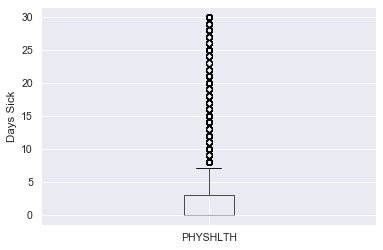

In [10]:
ax1 = df.boxplot(column = 'PHYSHLTH')
ax1.set_ylabel('Days Sick')


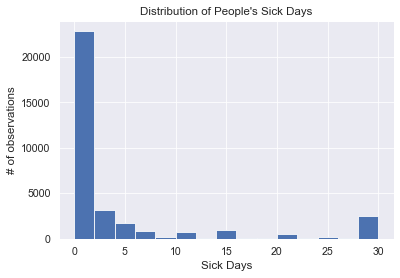

In [11]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax1 = ax.hist(df['PHYSHLTH'], bins=15)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [12]:
# code to calculate the average number of sick days by state
df.groupby('_STATE').agg({'PHYSHLTH' : 'mean'})

,PHYSHLTH
_STATE,
Conneticut,3.688562
New Jersey,4.380957
New York,4.148030


Text(0.5, 0, '')

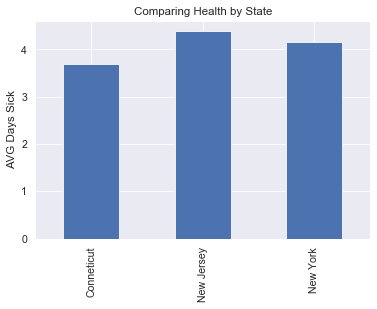

In [13]:
ax3 = df.groupby('_STATE')['PHYSHLTH'].mean().plot(kind = 'bar', title = 'Comparing Health by State', legend = False)
ax3.set_ylabel('AVG Days Sick')
ax3.set_xlabel('')


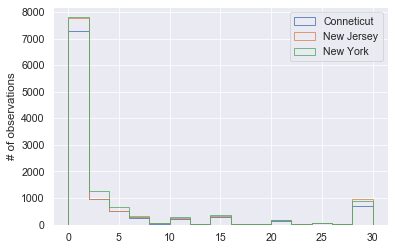

In [14]:
# graphic showing the histogram of data
# sns.distplot(df.groupby('_STATE')['PHYSHLTH'].value_counts(), kde=False).set_title("Distribution of People's Sick Days")
# df.groupby('_STATE')['PHYSHLTH'].value_counts()

df.groupby('_STATE')['PHYSHLTH'].plot(kind='hist', histtype='step', bins=15)
plt.ylabel('# of observations')
plt.legend()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [15]:
# code to create new colum for chronically sick
# use np.where to create a list of people who are sick for more than 10 days in a month

df['Chronically Sick'] = np.where(df['PHYSHLTH'] > 10, 1, 0)
df['Chronically Sick'].describe()

count    33747.000000
mean         0.128189
std          0.334305
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Chronically Sick, dtype: float64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [16]:
# code to calculate averages per state
# total_sick = df.loc[df['Chronically Sick'] == 1]
# sick_by_state = total_sick.groupby('_STATE').agg({'Chronically Sick' : 'count'})

# total_people = df.groupby('_STATE').agg({'Chronically Sick' : 'count'})

# sick_pcnt = sick_by_state.div(total_people, level = '_STATE')

# print(sick_pcnt)

df.groupby('_STATE')['Chronically Sick'].mean()

_STATE
Conneticut    0.114760
New Jersey    0.139291
New York      0.129252
Name: Chronically Sick, dtype: float64

In [17]:
# create graphic to compare chronically sick by state
# sick_pcnt.reset_index(inplace = True)
# sick_pcnt.plot.bar(x = '_STATE', y = 'Chronically Sick', legend = False)
# plt.xlabel('')
# plt.ylabel('AVG Days Sick')
# plt.title('Comparing Health by State')

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [18]:
# if 1 => smoker, keep 1
# if 2 => sometimes smoker, keep 2
# if 3 => no smoking, keep 3
# if 7 => dont know/not sure, keep 7
# if 9 => refused, keep 9
# if NAN => section 9.01 (2,7,9, missing)

# section 9.01 
    # 2 => map to 3 
    # 7 => map to 7
    # Refused => map to 9
    # not asked or missing => remove?

# df['SMOKDAY2'].loc[df['SMOKDAY2'] % 1 != 0]

df['SMOKDAY2'].fillna(0, inplace = True)
df['SMOKE100'].fillna(7, inplace = True)
#df.drop(columns = 'Smokers', axis = 1)

# def smokers (row):
#     if row['SMOKDAY2'] == 1:
#         return 'Every day'
#     elif row['SMOKDAY2'] == 2:
#         return 'Some days'
#     elif row['SMOKDAY2'] == 3 :
#         return 'Non-Smoker'
#     elif row['SMOKDAY2'] == 7:
#         return "Don't Know"
#     elif row['SMOKDAY2']  == 9:
#         return 'Refused'
#     elif row['SMOKDAY2'] == 0:
#         if row['SMOKE100'] == 2:
#             return 'Non-Smoker'
#         elif row['SMOKE100']  == 7:
#             return "Don't Know"
#         elif row['SMOKE100']  == 9:
#             return 'Refused'
#         elif row['SMOKE100'] != 1:
#             return "Don't Know"

# df['Smokers'] = df.apply(lambda row: smokers(row), axis=1)


conditions = [
    df['SMOKDAY2'] == 1,
    df['SMOKDAY2'] == 2,
    ((df['SMOKDAY2'] == 3) | ((df['SMOKDAY2'] == 0) & (df['SMOKE100'] == 2))),
    ((df['SMOKDAY2'] == 7) | ((df['SMOKDAY2'] == 0) & (df['SMOKE100']  == 7))) | 
    ((df['SMOKDAY2'] == 9) | ((df['SMOKDAY2'] == 0) & (df['SMOKE100']  == 9)))
]

choices = [
    'Everyday',
    'Some Days',
    'Non-Smoker',
    "Don't Know"
]

df['Smokers'] = np.select(conditions, choices, default = "Don't Know")
df['Smokers'].describe()
#df['Smokers'].value_counts()

count          33747
unique             4
top       Non-Smoker
freq           28179
Name: Smokers, dtype: object

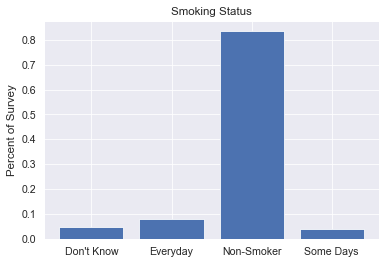

In [19]:
smokers = df.groupby('Smokers').count()

smokers.reset_index(inplace = True)

smoker_freq = []
for x in smokers['_STATE']:
    smoker_freq.append(x / smokers['_STATE'].sum())
    
smoker_type = []
for x in smokers['Smokers']:
    smoker_type.append(x)
    
new_figure = plt.figure()

ax = new_figure.add_subplot(111)

ax.bar(smoker_type, smoker_freq, color='b')

ax.set_ylabel('Percent of Survey')
ax.set_title('Smoking Status')

plt.show()


# status = smokers['Smokers']
# count = smokers['_STATE'].count()
# plot.bar(x = status, y = count, title = 'Smoker Status')

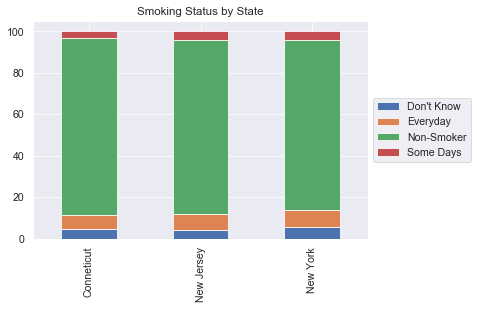

In [20]:
x = df.groupby(['_STATE'])['Smokers'].value_counts(normalize=True) * 100
y = x.unstack()
y.plot(kind = 'bar', stacked = True)
plt.xlabel('')
plt.title('Smoking Status by State')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#df.groupby(['_STATE', 'Smokers'])['Smokers'].count().unstack('Smokers')

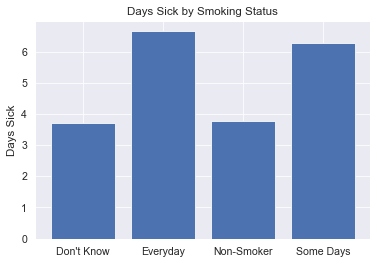

In [21]:
smokers_health = df.groupby('Smokers').mean()
smokers_health.reset_index(inplace = True)

smokers_type = []
for x in smokers_health['Smokers']:
    smokers_type.append(x)

    
health = []
for x in smokers_health['PHYSHLTH']:
    health.append(x)

new_figure = plt.figure()

ax = new_figure.add_subplot(111)

ax.bar(smokers_type, health, color='b')

ax.set_ylabel('Days Sick')
ax.set_title('Days Sick by Smoking Status')
# Show the plot
plt.show()

Completed everything prior to this except Stackplot for #6

******** REVIEW ALL MATPLOTLIB!!!!!!!!!!!!! ***********

In [22]:
#df.to_csv(r'\Updated_Data.csv', index = False)

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [23]:
# code here to clean up the ALCDAY5 responses
df['ALCDAY5']

alcohol_dict = {888: 0,          
             777: np.nan,
             999: np.nan}

df['ALCDAY5'] = df['ALCDAY5'].replace(alcohol_dict)
df['ALCDAY5']

def drinkers (row):
    if row['ALCDAY5'] >= 101 and row['ALCDAY5'] <= 107:
        x = (row['ALCDAY5'] - 100) * 4.325
        return min(int(x), 30)
    elif row['ALCDAY5'] >= 201 and row['ALCDAY5'] <= 230:
        return row['ALCDAY5'] - 200
    elif row['ALCDAY5'] == 0:
        return 0

df['Alc_cons'] = df.apply(lambda row: drinkers(row), axis=1)



In [24]:
df['Alc_cons'].describe()

count    31532.000000
mean         5.409806
std          8.364698
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: Alc_cons, dtype: float64

Text(0.5, 1.0, 'Distribution of Days Drinking')

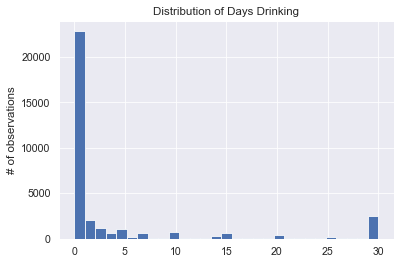

In [25]:
df['PHYSHLTH'].plot(kind='hist', bins=29)
plt.ylabel('# of observations')
plt.title('Distribution of Days Drinking')

In [26]:
# code to calculate averages per state
df.groupby('_STATE')['Alc_cons'].mean()

_STATE
Conneticut    6.107964
New Jersey    4.983564
New York      5.210257
Name: Alc_cons, dtype: float64

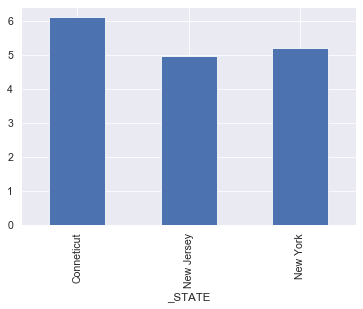

In [27]:
df.groupby('_STATE')['Alc_cons'].mean().plot.bar()

In [28]:
# Code to calculate correlation of between number of dirnks of number of days physically ill

health = df['PHYSHLTH']
alcohol_consumption = df['Alc_cons']

correlation = health.corr(alcohol_consumption)

print(correlation)

-0.08989054133005878


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


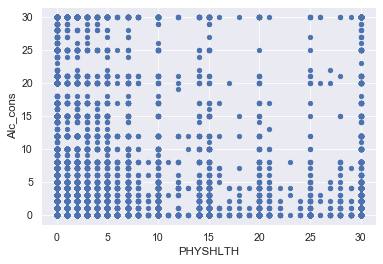

In [29]:
df.plot.scatter(x = 'PHYSHLTH', y = 'Alc_cons')

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [30]:
a=.95

In [31]:
def confidence_interval(n, mu, sigma):
    t_value = scs.t.ppf(.95, n-1)
    margin_of_error = (t_value * sigma) / (n**.5)
    confidence_interval = (mu - margin_of_error, mu + margin_of_error)
    return confidence_interval

In [32]:
import scipy.stats as scs

In [33]:
df['PHYSHLTH'].count()

33747

In [34]:
df['PHYSHLTH'].mean() 

4.085340919192817

In [35]:
sigma_p = df['PHYSHLTH'].std()
mu_p = df['PHYSHLTH'].mean()
n_p = df['PHYSHLTH'].count()

scs.norm.interval(a, loc=mu_p, scale= sigma_p / (n_p**.5))

(3.9945111797832156, 4.17617065860242)

In [36]:
confidence_interval(n_p, mu_p, sigma_p)

(4.009112106353981, 4.161569732031654)

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [37]:

def prop_confidence_int(x, n, alpha):
    z = scs.norm.cdf((1-alpha)/2)
    p_hat = x/n
    interval = ((p_hat - z*(((p_hat*(1-p_hat))/n)**.5)), (p_hat + z*(((p_hat*(1-p_hat))/n)**.5)))
    return interval

In [38]:
import numpy as np
import statsmodels.stats.proportion as ssp
from statsmodels.stats.proportion import proportions_ztest

In [39]:
# ssp.proportions_ztest(x_c, n_c, value=0, alternative='two-sided')

In [40]:
sigma_c = df['Chronically Sick'].std()
x_c = df['Chronically Sick'].sum()
n_c = df['Chronically Sick'].count()
mu_c = df['Chronically Sick'].mean()


In [41]:
scs.norm.interval(a, loc=mu_c, scale=((sigma_c) / n_c**.5))

(0.12462241357435172, 0.13175593116740308)

In [42]:
prop_confidence_int(x_c, n_c, a)

(0.12726113388158916, 0.12911721086016564)

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


In [43]:
sex_dict = {1: 'Male',
           2: 'Female',
           9: np.nan}

df['SEX'] = df['SEX'].replace(sex_dict)

In [44]:
df.dropna(subset = ['SEX'], inplace = True)

FUNCTIONS

In [45]:
def confidence_interval(n, mu, std):
    t_value = scs.t.ppf(.95, n-1)
    margin_of_error = (t_value * std) / (n**.5)
    confidence_interval = (mu - margin_of_error, mu + margin_of_error)
    return confidence_interval

In [46]:
def mean_stat_test(x_bar1, x_bar2, std1, std2, n1, n2):
    sp = ((((n1-1)*(std1**2)) + ((n2-1)*(std2**2))) / (n1+n2-2))**.5
    z = (x_bar1 - x_bar2) / (sp*((1/n1)+(1/n2))**.5)
    return z

In [47]:
def prop_stat_test(x1, x2, n1, n2):
    p_star = (x1+x2) / (n1+n2)
    p1_hat = x1/n1
    p2_hat = x2/n2
    
    z_star = (p1_hat-p2_hat)/ ((p_star*(1-p_star)*((1/n1) + (1/n2)))**.5)
    return z_star

Problem 1

In [48]:
z = (4.085341 - 4) / (8.513293 / (33747**.5))
scs.norm.cdf(z)

0.967227704999845

Problem 2 - grouped by sex

h0 : mu (male) = mu (female)

h0 : mu (male) =/= mu (female)

Attempt at using Ttest from scipy

In [52]:
male = grouped_by_sex['PHYSHLTH'][grouped_by_sex['SEX'] == 'Male']
female = grouped_by_sex['PHYSHLTH'][grouped_by_sex['SEX'] == 'Female']

In [53]:
scs.ttest_ind(male, female)

Ttest_indResult(statistic=-7.3333586565586, pvalue=2.2949494325716564e-13)

In [54]:
grouped_by_sex = df[['PHYSHLTH', 'SEX']]

In [55]:
grouped_by_sex.groupby('SEX').describe()

PHYSHLTH                                              
          count      mean       std  min  25%  50%  75%   max
SEX                                                          
Female  18911.0  4.385278  8.715034  0.0  0.0  0.0  3.0  30.0
Male    14818.0  3.700972  8.230261  0.0  0.0  0.0  2.0  30.0

In [56]:
n1p = 14818
n2p = 18911
x_bar1p = 3.701
x_bar2p = 4.385
std1p = 8.23
std2p = 8.715

n = 34747


In [57]:
mean_stat_test(x_bar1p, x_bar2p, std1p, std2p, n1p, n2p)

-7.330185183517949

In [58]:
scs.norm.interval(a, loc=mu_c, scale=sigma_p)

(-16.557557816192844, 16.8139361609346)

Problem 3 - grouped by state  (ANOVA Test)

h0: mu (conn) = mu (nj) = mu (ny)

ha: h0 is not true

In [59]:
df.groupby('_STATE')['PHYSHLTH'].describe()

,count,mean,std,min,25%,50%,75%,max
_STATE,,,,,,,,
Conneticut,10398.0,3.684555,8.097946,0.0,0.0,0.0,2.0,30.0
New Jersey,11458.0,4.380957,8.923776,0.0,0.0,0.0,3.0,30.0
New York,11873.0,4.149078,8.446140,0.0,0.0,0.0,3.0,30.0


In [60]:
group_by_state = df[['PHYSHLTH', '_STATE']]

In [61]:
group_by_state.groupby('_STATE').describe()

PHYSHLTH                                              
              count      mean       std  min  25%  50%  75%   max
_STATE                                                           
Conneticut  10398.0  3.684555  8.097946  0.0  0.0  0.0  2.0  30.0
New Jersey  11458.0  4.380957  8.923776  0.0  0.0  0.0  3.0  30.0
New York    11873.0  4.149078  8.446140  0.0  0.0  0.0  3.0  30.0

In [62]:
n_c = 10413
n_nj = 11458
n_ny = 11876
x_bar_c = 3.688
x_bar_nj = 4.381
x_bar_ny = 4.148
std_c = 8.104
std_nj = 8.924
std_ny = 8.445

In [63]:
df['PHYSHLTH'].unique()

array([ 0.,  2., 28.,  5., 30.,  4.,  3., 15., 29.,  7., 10., 14.,  6.,
        1.,  8., 25., 20., 12., 18., 27., 21., 19., 22.,  9., 13., 17.,
       11., 16., 24., 26., 23.])

In [64]:
conn_p = df['PHYSHLTH'][df['_STATE'] == 'Conneticut']
nj_p = df['PHYSHLTH'][df['_STATE'] == 'New Jersey']
ny_p = df['PHYSHLTH'][df['_STATE'] == 'New York']

In [65]:
scs.f_oneway(conn_p, nj_p, ny_p)

F_onewayResult(statistic=18.78798131562152, pvalue=6.998830805800168e-09)

### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

Problem 1

In [66]:
df[['Chronically Sick', 'SEX']].describe()

,Chronically Sick
count,33729.000000
mean,0.128169
std,0.334282
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [67]:
z_state = (.128 - .1) / (.3343 / ((33747)**.5))
print(scs.norm.cdf(z_state)*100)
z_state

100.0


15.386478718879342

In [68]:
scs.norm.interval(a, loc=mu_c, scale=sigma_c)

(-0.5270371360486545, 0.7834154807904095)


Problem 2

h0: p(male) = p(female)

ha: p(male) =/= p(female)

In [69]:
df.groupby(['SEX'])['Chronically Sick'].describe()

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
Female,18911.0,0.138279,0.345202,0.0,0.0,0.0,0.0,1.0
Male,14818.0,0.115265,0.319353,0.0,0.0,0.0,0.0,1.0


In [70]:
df.groupby(['SEX'])['Chronically Sick'].sum()

SEX
Female    2615
Male      1708
Name: Chronically Sick, dtype: int64

In [71]:
x1_chronic = 1708
x2_chronic = 2615
n1_chronic = 14818
n2_chronic = 18911

prop_stat_test(x1_chronic, x2_chronic, n1_chronic, n2_chronic)

-6.2753361557202

In [72]:
xch = x1_chronic + x2_chronic
nch = n1_chronic + n2_chronic
a_ch = .95

In [73]:
prop_confidence_int(xch, nch, a_ch)

(0.12724041559751376, 0.12909686093010342)

In [74]:
df[['Chronically Sick', 'SEX']]
malec = df['Chronically Sick'][df['SEX'] == 'Male']
femalec = df['Chronically Sick'][df['SEX'] == 'Female']

In [75]:
scs.ttest_ind(malec, femalec)

Ttest_indResult(statistic=-6.278816546036843, pvalue=3.4530934930911556e-10)

Problem 3 - Chi-squared Test

h0: p(conn) = p(nj) = p(ny)

ha: h0 is not True

In [76]:
df.groupby(['_STATE'])['Chronically Sick'].describe()

,count,mean,std,min,25%,50%,75%,max
_STATE,,,,,,,,
Conneticut,10398.0,0.114637,0.318599,0.0,0.0,0.0,0.0,1.0
New Jersey,11458.0,0.139291,0.346265,0.0,0.0,0.0,0.0,1.0
New York,11873.0,0.129285,0.335529,0.0,0.0,0.0,0.0,1.0


In [77]:
df['Chronically Sick'].unique()

array([0, 1])

In [78]:
df.groupby(['_STATE'])['Chronically Sick'].sum()

_STATE
Conneticut    1192
New Jersey    1596
New York      1535
Name: Chronically Sick, dtype: int64

In [79]:
x_c_chronic = 1195
x_nj_chronic = 1596
x_ny_chronic = 1535
n_c_chronic = 10413
n_nj_chronic = 11458
n_ny_chronic = 11876

In [80]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [81]:
chi_test_list = [[x_c_chronic, x_nj_chronic, x_ny_chronic],
                [n_c_chronic, n_nj_chronic, n_ny_chronic]]

In [82]:
stat, p, dof, expected = chi2_contingency(chi_test_list)

In [83]:
prob = .95

In [84]:
critical = chi2.ppf(prob, dof)
critical

5.991464547107979

In [85]:
stat

22.90357772530734

stat > critical

reject the hypothesis

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

##ANOVA

In [86]:
import numpy as np

In [87]:
new_value = {1 : 'Excellent',
            2 : 'Very Good',
            3 : 'Good',
            4 : 'Fair',
            5 : 'Poor',
            7 : np.nan,
            9 : np.nan}

df['GENHLTH'] = df['GENHLTH'].replace(new_value)

In [88]:
df2 = df.dropna(subset = ['PA1MIN_'])

In [89]:
df2 = df2.loc[df2['PA1MIN_'] < 5000]

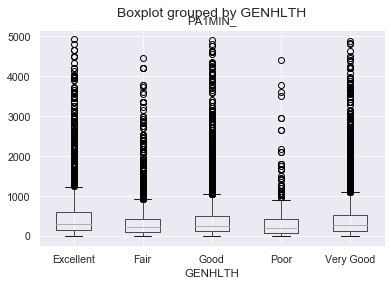

In [90]:
ax1 = df2.boxplot(by = 'GENHLTH',column = 'PA1MIN_')

In [91]:
df2.groupby('GENHLTH')['PA1MIN_'].describe()

,count,mean,std,min,25%,50%,75%,max
GENHLTH,,,,,,,,
Excellent,4883.0,473.815892,557.550736,0.0,150.0,300.0,585.5,4920.0
Fair,2086.0,383.533078,536.258180,0.0,90.0,210.0,420.0,4440.0
Good,6214.0,414.848407,538.979111,0.0,120.0,240.0,490.0,4900.0
Poor,555.0,340.100901,507.548522,0.0,70.0,180.0,420.0,4410.0
Very Good,8209.0,426.584359,521.203655,0.0,120.0,260.0,510.0,4870.0


In [92]:
df2['PA1MIN_'].describe()

count    21986.000000
mean       427.337033
std        536.663957
min          0.000000
25%        120.000000
50%        260.000000
75%        510.000000
max       4920.000000
Name: PA1MIN_, dtype: float64

Confidence Intervale at 95% confidence

In [93]:
n_pa = df2.PA1MIN_.count()
mean_pa = df2.PA1MIN_.mean()
std_pa = df2.PA1MIN_.std()


In [94]:
confidence_interval(n_pa, mean_pa, std_pa)

(421.38349817058076, 433.2905671437102)

In [95]:
scs.norm.interval(a, loc=mean_pa, scale=(std_pa / n_pa**.5))

(420.24325768749264, 434.4308076267983)

2 way test for gender

In [96]:
malepa = df2['PA1MIN_'][df2['SEX'] == 'Male']
femalepa = df2['PA1MIN_'][df2['SEX'] == 'Female']

In [97]:
scs.ttest_ind(malepa, femalepa)

Ttest_indResult(statistic=6.42133821751921, pvalue=1.3784314041818877e-10)

In [98]:
scs.f_oneway(malepa, femalepa)

F_onewayResult(statistic=41.23358450377278, pvalue=1.3784314042018776e-10)

T Statistic = 6.421

pvalue = 1.378 e-10

In [100]:
df2.groupby('SEX')['PA1MIN_'].describe()

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
Female,11992.0,406.139676,509.354498,0.0,120.0,240.0,480.0,4870.0
Male,9994.0,452.772163,566.682031,0.0,120.0,272.0,560.0,4920.0


**add means of the data

ANOVA Test for General Health

put hypothesis test

In [102]:
scs.f_oneway(df2['PA1MIN_'][df2['GENHLTH'] == 'Excellent'],
                df2['PA1MIN_'][df2['GENHLTH'] == 'Very Good'],
                df2['PA1MIN_'][df2['GENHLTH'] == 'Good'],
                df2['PA1MIN_'][df2['GENHLTH'] == 'Fair'],
                df2['PA1MIN_'][df2['GENHLTH'] == 'Poor'])

F_onewayResult(statistic=17.20996549100269, pvalue=4.197009510072764e-14)

T Statistic = 9.0458

pvalue = 2.688 e-7

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.

Cleaing up the Data

In [103]:
race_dict = {1.0 : 'White',
            2.0 : 'Black',
            3.0 : 'Asian',
            4.0 : 'American Indian',
            5.0 : 'Hispanic',
            6.0 : 'Other'}

df['_IMPRACE'] = df['_IMPRACE'].replace(race_dict)

In [104]:
flu_shot_dict = {1: 1,
                2: 0,
                7: np.nan,
                9: np.nan}

df['FLUSHOT6'] = df['FLUSHOT6'].replace(flu_shot_dict)

In [105]:
df3 = df.dropna(subset = ['FLUSHOT6'])

In [106]:
df3 = df3[['_IMPRACE', 'SEX', 'FLUSHOT6']]

Confidence Interval

In [107]:
df3['FLUSHOT6'].describe()

count    30213.000000
mean         0.480786
std          0.499639
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: FLUSHOT6, dtype: float64

In [108]:
n_fs = df3.FLUSHOT6.count()
mean_fs = df3.FLUSHOT6.mean()
std_fs = df3.FLUSHOT6.std()

In [109]:
confidence_interval(n_fs, mean_fs, std_fs)

(0.47605817164774755, 0.4855146612387583)

In [110]:
scs.norm.interval(a, loc=mean_fs, scale=std_fs/(n_fs**.5))

(0.4751525380245337, 0.48642029486197214)

2 way test for males and females

In [111]:
df3.groupby('SEX')['FLUSHOT6'].describe()

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
Female,17017.0,0.505142,0.499988,0.0,0.0,1.0,1.0,1.0
Male,13196.0,0.449379,0.497450,0.0,0.0,0.0,1.0,1.0


In [112]:
df3.groupby('SEX')['FLUSHOT6'].sum()

SEX
Female    8596.0
Male      5930.0
Name: FLUSHOT6, dtype: float64

In [113]:
male_fs = df3['FLUSHOT6'][df3['SEX'] == 'Male']
female_fs = df3['FLUSHOT6'][df3['SEX'] == 'Female']

In [114]:
scs.ttest_ind(male_fs, female_fs)

Ttest_indResult(statistic=-9.63645440655011, pvalue=6.032410966500048e-22)

In [115]:
x1_fs = 5930
x2_fs = 8596
n1_fs = 13196
n2_fs = 17017

In [163]:
z_star = prop_stat_test(x1_fs, x2_fs, n1_fs, n2_fs)

In [164]:
scs.norm.cdf(z_star)

3.228267995669437e-22

Chi-Squared Test

null hypothesis : p.flushot(White) =  p.flushot(Black) =  p.flushot(Hispanic) =  p.flushot(American Indian) =  p.flushot(Asian) =  p.flushot(Other) = 

In [117]:
df3.groupby('_IMPRACE')['FLUSHOT6'].describe()

,count,mean,std,min,25%,50%,75%,max
_IMPRACE,,,,,,,,
American Indian,175.0,0.428571,0.496292,0.0,0.0,0.0,1.0,1.0
Asian,980.0,0.451020,0.497849,0.0,0.0,0.0,1.0,1.0
Black,2781.0,0.390147,0.487871,0.0,0.0,0.0,1.0,1.0
Hispanic,3283.0,0.393238,0.488543,0.0,0.0,0.0,1.0,1.0
Other,605.0,0.393388,0.488906,0.0,0.0,0.0,1.0,1.0
White,22389.0,0.508955,0.499931,0.0,0.0,1.0,1.0,1.0


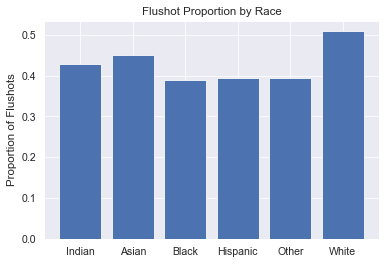

In [153]:
new_figure = plt.figure()

ax = new_figure.add_subplot(111)

ax.bar(race, race_prop, color='b')

ax.set_ylabel('Proportion of Flushots')
ax.set_title('Flushot Proportion by Race')
# Show the plot
plt.show()

In [119]:
df3.groupby('_IMPRACE')['FLUSHOT6'].count()

_IMPRACE
American Indian      175
Asian                980
Black               2781
Hispanic            3283
Other                605
White              22389
Name: FLUSHOT6, dtype: int64

In [120]:
total_by_race = df3.groupby('_IMPRACE')['FLUSHOT6'].count()
sum_by_race = df3.groupby('_IMPRACE')['FLUSHOT6'].sum()

In [148]:
x_race = []
for x in sum_by_race:
    x_race.append(x)

n_race = []
for x in total_by_race:
    n_race.append(x)   

race = ['Indian', 'Asian', 'Black', 'Hispanic', 'Other', 'White']

In [149]:
race_prop = []
for i in range(len(n_race)):
    race_prop.append(x_race[i]/n_race[i])

In [150]:
race_prop

[0.42857142857142855,
 0.45102040816326533,
 0.3901474289823804,
 0.3932378921717941,
 0.3933884297520661,
 0.5089552905444638]

In [151]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [152]:
chi_test_race = [x_race, n_race]

In [126]:
stat, p, dof, expected = chi2_contingency(chi_test_race)

In [127]:
prob = .95

In [128]:
crit = chi2.ppf(prob, dof)
crit

11.070497693516351

In [129]:
stat

105.07428625300088

stat > crit

so we reject the null hypothesis